In [36]:
import pandas as pd
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from sklearn import svm
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

%matplotlib inline

In [3]:
given_images = pd.read_csv('train_digitalRecogniser.csv')
given_images.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
images = given_images.iloc[0:,1:]
images.head()
type(images)

pandas.core.frame.DataFrame

pandas.core.frame.DataFrame

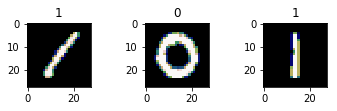

In [8]:
images_repr = images
images_repr= images_repr.values.reshape(images_repr.shape[0], 28, 28)
for i in range(0, 3):
    
    plt.subplot(330 + (i+1))
    plt.imshow(images_repr[i], cmap=plt.get_cmap('gist_earth'))
    plt.title(labels[i])
    
type(images)
#images = images.reshape()

In [78]:

type(images)

#type(images_repr)

pandas.core.frame.DataFrame

In [17]:
labels = given_images.iloc[0:,0]

labels.shape
type(labels)

pandas.core.series.Series

In [9]:
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, train_size = 0.75, test_size = 0.25, random_state= 1)

In [10]:
test_images_final = test_images[test_images > 0]
test_images_final.fillna(1, inplace = True)


train_images_final = train_images[test_images > 0]
train_images_final.fillna(1, inplace = True)
train_images_final.head()



#test_images[test_images>0]=1


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
25138,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
40867,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
17205,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3450,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1491,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [81]:
#clf = svm.SVC()
clf = RandomForestClassifier()
#clf = DecisionTreeClassifier()
clf.fit(train_images, train_labels)
label_pred = clf.predict(test_images)

In [82]:
accuracy = accuracy_score(test_labels, label_pred)
print(accuracy)

0.9411428571428572


In [83]:
df1 = pd.read_csv('test_digitalRecogniser.csv')
df1
result = clf.predict(df1)
df = pd.DataFrame(result)
df.index.name ='ImageId'
df.index+=1
df.columns = ['Label']
df.to_csv('results_digital recogniser.csv' , header = True)

df.head()
#df.shape

,Label
ImageId,
1,2
2,0
3,9
4,4
5,3


In [195]:
#dimensionality reduction
scalar = StandardScaler()
ss_train_images = StandardScaler().fit_transform(images)
pca = PCA(n_components = 40)
xtrain = pca.fit(ss_train_images).transform(ss_train_images)


train_images, test_images, train_labels, test_labels = train_test_split(xtrain, labels, train_size = 0.75, test_size = 0.25, random_state= 1)
print(pca.explained_variance_ratio_)


clf = RandomForestClassifier()
#clf = DecisionTreeClassifier()
clf.fit(train_images, train_labels)
label_pred = clf.predict(test_images)
accuracy = accuracy_score(test_labels, label_pred)
print(accuracy)


[0.05747953 0.04111691 0.03782867 0.02939862 0.02556439 0.02229844
 0.01952552 0.01771605 0.0156266  0.01424956 0.01361009 0.01222541
 0.01135736 0.0111309  0.0105031  0.01012324 0.00951301 0.00934513
 0.00907256 0.00885323 0.00838904 0.00812003 0.00775151 0.00752277
 0.00727606 0.00698667 0.00690258 0.00664438 0.00630323 0.00614682
 0.00609958 0.00595817 0.00576329 0.00572483 0.00564147 0.00545447
 0.00533992 0.00519165 0.0050175  0.00483923]
0.9087619047619048


Text(0.5,1,'ScreePlot')

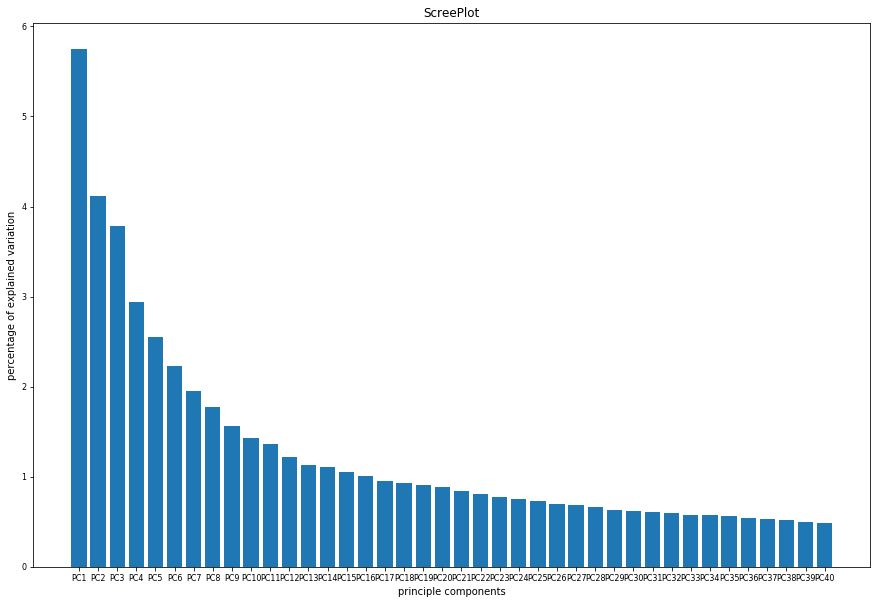

In [199]:
#scree_plot
pca_bars = np.round(pca.explained_variance_ratio_*100, decimals= 4)
label_no = ['PC'+ str(x) for x in range(1, len(pca_bars)+1)]
plt.bar(x=range(1, len(pca_bars)+1), height = pca_bars, tick_label = label_no)
plt.tick_params(labelsize= 8)
plt.rcParams['figure.figsize']= (15, 10)
plt.ylabel('percentage of explained variation')
plt.xlabel('principle components')
plt.title('ScreePlot')


Text(0.5,0,'PCA1-5.748%')

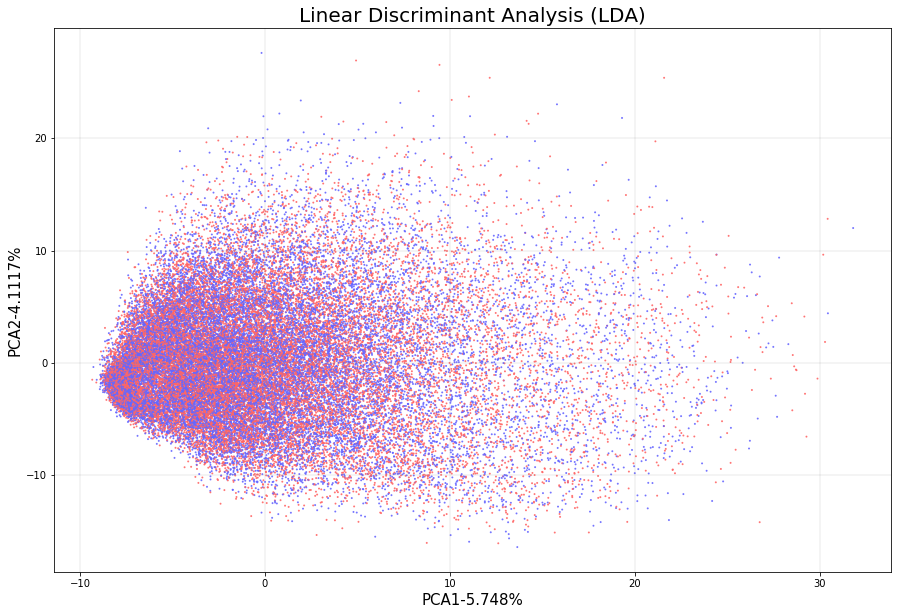

In [197]:
pca_df = pd.DataFrame(xtrain, columns = label_no)
pca_df.head()
colors = ['#6666ff', '#ff6666']
plt.scatter(pca_df.PC1, pca_df.PC2, cmap = 'grey', alpha= 0.8, c=colors, s= 1)
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.7)
plt.title('Linear Discriminant Analysis (LDA)', fontsize = 20)
plt.ylabel('PCA2-'+str(pca_bars[1])+'%', fontsize = 15)
plt.xlabel('PCA1-'+str(pca_bars[0])+'%', fontsize = 15)
